# <center>Central Limit Theorem and Bootstrapping<center/> 
**<center>Helping us accuractely estimate the parameters of a population<center/>**

## The Big Picture 
1. If you draw large(minimum of 30), random samples from any population(regardless of it's distribution), the means of those samples will be distributed normally around the _population mean_(which is likely unknown).
2. Most sample means will lie reasonably close to the population mean; the standard error defines reasonably close. 
3. It is relatively unlikely that a sample mean will lie more than 2 standard errors from the population mean and extremely unlikely that it will lie 3 or more SE from the population mean. 


### Let's think through an example 
Suppose we want to know the average income of all people at BSC this summer(students and faculty) but our sample of the entire population consists of people in this room. We're in luck cause there are 39 of us. According to the CLT we could take repeated samples(with replacement) of the persons in this room and get those _sample means_; plot them and then take the mean of those sample means. That sample means _mean_ should be very close to the actual population mean. Some means will be higher and lower due to chance. 

### Revisting Standard Error 
SE = $\frac{\sigma}{\sqrt{n}}$ <br/>
$\sigma$ = sample standard deviation <br/>
n = number of samples 

- SE measures the dispersion of the sample means. SD measures the dispersion in the underlying population. 
- A large SE means that the _sample means_ are spread out widely around the population mean - you can try to solve this problem by getting larger sample sizes. However, if you still have a high SE after getting larger sample sizes you must conclude that the SD of the underlying population must also be large. 

## Bootstrapping
One method of getting the confidence interval is to use bootstrap sampling. The idea is that we sample our sample to get an idea of what extreme values we could have got when sampling the population. With this, we can construct a confidence interval for our sample of the population

The important thing to realize is we only use our sample to determine the confidence interval.

![](https://miro.medium.com/max/700/1*iH5w0MBdiOlxDOCX6nmqqw.png)

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# External file
titanic_file = 'https://github.com/MrGeislinger/flatiron-school-data-science-curriculum-resources/raw/main/ProbabilityAndStats/StatisticalDistributions/data/titanic.csv'
df_titanic = pd.read_csv(titanic_file)
ages = df_titanic.Age.dropna()

0.42

80.0

14.516321150817316

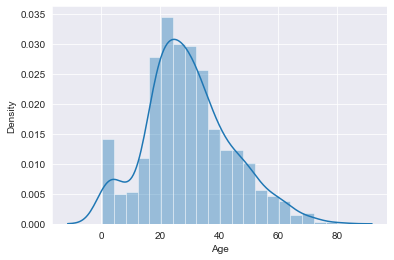

In [5]:
sns.distplot(ages)
display(np.min(ages), np.max(ages), np.std(ages))

In [8]:
# Get an example sample
sample = ages.sample(10, replace=True, random_state=1)
print(sample.mean())
display(sample)

25.7


51     21.0
291    19.0
93     26.0
808    39.0
179    36.0
161    40.0
733    23.0
642     2.0
489     9.0
349    42.0
Name: Age, dtype: float64

In [9]:
def get_all_sample_means(data, n=10, n_samples=100):
    
    samples = np.random.choice(data,size=(n_samples,n))
    means = np.mean(samples, axis=1)
    
    return means

In [10]:
# Get many samples and their respective means
samples = get_all_sample_means(ages,n=10, n_samples=30)
samples

array([27.8  , 23.7  , 30.5  , 29.55 , 20.45 , 27.3  , 25.4  , 23.383,
       24.2  , 37.75 , 30.55 , 31.642, 33.5  , 27.5  , 29.2  , 42.4  ,
       25.2  , 29.8  , 24.   , 36.   , 30.7  , 34.1  , 28.   , 25.05 ,
       29.05 , 25.6  , 32.05 , 31.95 , 33.1  , 31.7  ])

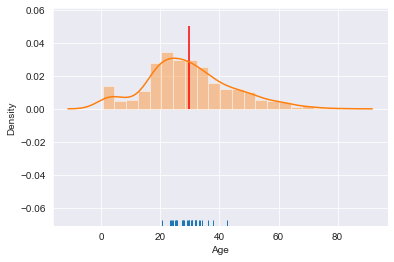

In [11]:
# See the sample and the full data compared
sns.distplot(
    samples,    # Shows sample means
    kde=False, 
    hist=False, 
    rug=True
)
ax = sns.distplot(ages)
ax.vlines(ages.mean(), color='red',ymin=0,ymax=0.05);

In [12]:
def bootstrap_sample(sample, n_samples=10**4):
    
    bs_sample_means = get_all_sample_means(
        sample, 
        n=len(sample),
        n_samples=n_samples
    )
    
    return bs_sample_means

In [13]:
b_sample_means = bootstrap_sample(sample)
display(np.mean(sample))
display(b_sample_means)

25.7

array([24.5, 24. , 26.9, ..., 26.1, 31.3, 25.4])

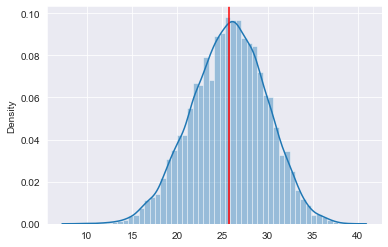

In [14]:
sns.distplot(b_sample_means)
plt.axvline(b_sample_means.mean(), color='red')

In [15]:
np.mean(b_sample_means)

25.71452

In [16]:
two_std = np.std(b_sample_means)*2
(np.mean(sample)-two_std, np.mean(sample)+two_std)

(17.483640911060423, 33.91635908893957)

In [17]:
#calculate standard error of the mean 
#Note that we must specify ddof=1 in the argument for this function 
#This calculates the sample standard deviation as opposed to the population standard deviation.
np.std(b_sample_means, ddof=1) / np.sqrt(np.size(b_sample_means))

0.041083849688539696